# Correlation between external weather parameters and electricity prices

In [1]:
import pandas as pd
nordpool = pd.read_csv("nordpool_estonia.csv")
ilmateenistus = pd.read_csv("ilmateenistus.csv")

In [2]:
ilmateenistus.head()

,Time,AirPressure,Precipitation,AirHumidity,Temperature,WindSpeed,Date
0,00:00:00,1000.9,0.7,96.0,1.5,4.3,2013-01-01
1,01:00:00,1000.7,0.0,97.0,1.9,3.7,2013-01-01
2,02:00:00,1000.0,0.3,97.0,2.7,3.9,2013-01-01
3,03:00:00,999.9,0.0,97.0,2.9,4.0,2013-01-01
4,04:00:00,999.9,0.0,97.0,3.6,3.8,2013-01-01


In [3]:
ilmateenistus.index[ilmateenistus.Date=="2016-01-01"][0]

26280

In [4]:
#This is necessary, because in the nordpool dataset we only have data starting from 01.01.2016
ilmateenistus = ilmateenistus[ilmateenistus.index >= ilmateenistus.index[ilmateenistus.Date=="2016-01-01"][0]]
ilmateenistus = ilmateenistus.reset_index()#Resetting the index to start from 0
del ilmateenistus['index']
ilmateenistus.head(20)


,Time,AirPressure,Precipitation,AirHumidity,Temperature,WindSpeed,Date
0,00:00:00,1037.7,0.0,89.0,-7.0,3.9,2016-01-01
1,01:00:00,1037.7,0.0,84.0,-7.4,3.1,2016-01-01
2,02:00:00,1037.9,0.0,80.0,-8.1,5.3,2016-01-01
3,03:00:00,1037.7,0.0,81.0,-8.2,4.2,2016-01-01
4,04:00:00,1038.1,0.0,83.0,-8.2,3.9,2016-01-01
5,05:00:00,1038.1,0.0,81.0,-8.1,4.0,2016-01-01
6,06:00:00,1038.2,0.0,83.0,-8.2,3.0,2016-01-01
7,07:00:00,1038.5,0.0,74.0,-8.7,4.1,2016-01-01
8,08:00:00,1038.6,0.0,74.0,-9.3,3.7,2016-01-01
9,09:00:00,1038.9,0.0,75.0,-9.8,3.1,2016-01-01


In [54]:
#Since it's hard to visualise data when it's hourly data over the span of 4 years, I will convert it into weekly data.
daily_AirPressure = []
daily_Precipitation = []
daily_AirHumidity = []
daily_Temperature = []
daily_WindSpeed = []
week_nr = []
i = 0
week_counter = 1
while (i < len(ilmateenistus)):
    
    currentDayAirPressure = 0
    currentDayPrecipitation = 0
    currentDayAirHumidity = 0
    currentDayTemperature = 0
    currentDayWindSpeed = 0
    
    for j in range(168):
        currentDayAirPressure += ilmateenistus.iloc[i, 1]
        currentDayPrecipitation += ilmateenistus.iloc[i, 2]
        currentDayAirHumidity += ilmateenistus.iloc[i, 3]
        currentDayTemperature += ilmateenistus.iloc[i, 4]
        currentDayWindSpeed += ilmateenistus.iloc[i, 5]
        i+=1
    
    daily_AirPressure.append(round(currentDayAirPressure/168, 2))
    daily_Precipitation.append(round(currentDayPrecipitation/168, 2))
    daily_AirHumidity.append(round(currentDayAirHumidity/168,2))
    daily_Temperature.append(round(currentDayTemperature/168,2))
    daily_WindSpeed.append(round(currentDayWindSpeed/168,2))
    week_nr.append(week_counter)
    week_counter+=1

data = {"Air pressure":daily_AirPressure, "Precipitation":daily_Precipitation, "Air humidity":daily_AirHumidity, "Temperature":daily_Temperature, "Wind speed":daily_WindSpeed, "Week number":week_nr}
ilmateenistus_weekly = pd.DataFrame(data)


In [42]:
nordpool.head(30)

,Date,Time,elspot_price,consumption
0,2016-01-01,00:00:00,16.39,911.0
1,2016-01-01,01:00:00,16.04,882.0
2,2016-01-01,02:00:00,15.74,854.0
3,2016-01-01,03:00:00,15.57,828.0
4,2016-01-01,04:00:00,15.47,821.0
5,2016-01-01,05:00:00,15.75,823.0
6,2016-01-01,06:00:00,15.36,842.0
7,2016-01-01,07:00:00,15.37,864.0
8,2016-01-01,08:00:00,15.19,869.0
9,2016-01-01,09:00:00,15.39,910.0


In [53]:
weekly_prices = []
weekly_consumption = []
week_nr = []
i = 0
week_counter = 1
while (i < nordpool.index[nordpool.Date=="2021-01-01"][0]):
    currentWeekPrice = 0
    currentWeekConsumption = 0

    for j in range(168):
        currentWeekPrice += nordpool.iloc[i, 2]
        currentWeekConsumption += nordpool.iloc[i,3]
        i+=1
        
    weekly_prices.append(round(currentWeekPrice/168, 2))
    weekly_consumption.append(round(currentWeekConsumption/168, 2))
    week_nr.append(week_counter)
    week_counter +=1
    
nordpool_weekly = pd.DataFrame({"Price": weekly_prices, "Consumption": weekly_consumption, "Week number": week_nr})

In [50]:
nordpool_weekly.head(40)

,Price,Consumption,Week number
0,30.86,1177.31,1
1,40.59,1305.36,2
2,53.45,1206.96,3
3,32.67,1165.47,4
4,26.13,1073.12,5
5,29.32,1057.73,6
6,29.76,1054.14,7
7,25.05,1016.23,8
8,28.65,1035.82,9
9,29.53,1029.26,10


In [56]:
ilmateenistus_daily.tail(20)

,Air pressure,Precipitation,Air humidity,Temperature,Wind speed,Week number
241,1014.08,0.00,72.19,17.63,1.67,242
242,1008.70,0.12,82.08,16.09,2.10,243
243,1013.16,0.25,88.26,13.89,1.87,244
244,1010.81,0.13,85.68,13.75,2.59,245
245,1014.17,0.05,82.76,13.42,2.94,246
246,1014.06,0.00,76.52,13.30,2.77,247
247,1015.68,0.01,80.70,13.97,2.24,248
248,1015.11,0.03,81.46,13.39,3.01,249
249,1016.06,0.07,89.61,8.69,NaN,250
250,1009.79,0.13,87.39,4.43,2.38,251


In [66]:
import matplotlib.pyplot as plt

# allows to output plots in the notebook
%matplotlib inline 

# Set the default style
#plt.style.use("ggplot") 
plt.rcParams["figure.figsize"] = (15, 10)

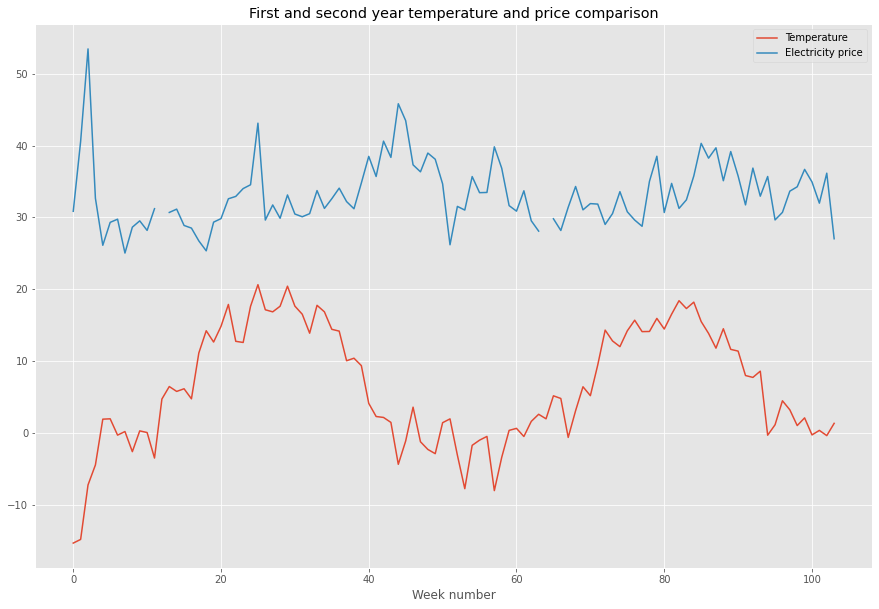

In [84]:
plt.plot(ilmateenistus_weekly["Temperature"].head(104), label = "Temperature")
plt.plot(nordpool_weekly["Price"].head(104), label = "Electricity price")
plt.xlabel("Week number")
plt.title("First and second year temperature and price comparison")
plt.legend()

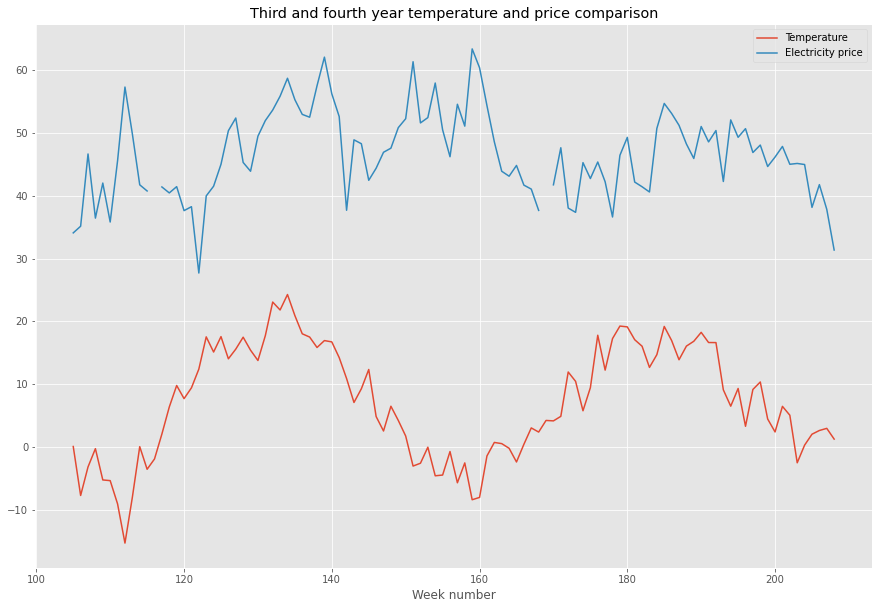

In [83]:
plt.plot(ilmateenistus_weekly["Temperature"][105:209], label = "Temperature")
plt.plot(nordpool_weekly["Price"][105:209], label = "Electricity price")
plt.xlabel("Week number")
plt.title("Third and fourth year temperature and price comparison")
plt.legend()

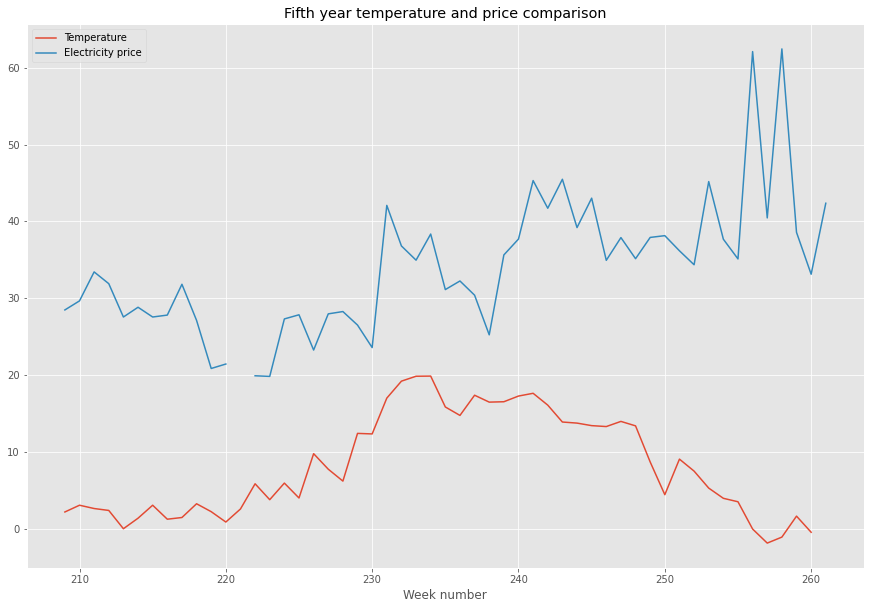

In [77]:
plt.plot(ilmateenistus_weekly["Temperature"][209:], label = "Temperature")
plt.plot(nordpool_weekly["Price"][209:], label = "Electricity price")
plt.xlabel("Week number")
plt.title("Fifth year temperature and price comparison")
plt.legend()

## Analysis towards correlations between temperature and electricity prices in Estonia

As to be expected, the overall trend is that as the temperature reaches the extremes - either very high or very low, the electricity prices rise. This is mostly because, as temperatures get reach the extremes, people tend to start controlling temperatures inside their homes and the electricity usage spikes. Once electricity usage goes through the roof, the runt of the work is done by coal and gas power plants. This, in fact, is taxed in Estonia and since it costs more for the provider to "create" electricity, the price for the end user is also significantly higher. This logic can briefly be read about here: https://www.err.ee/1608240762/elektri-hind-on-hakanud-huppeliselt-kasvama (in Estonian).

The logic behind the correlation remains the same throughout the 5 years - the optimal temperature for the lowest electricity prices is between 0-15 degrees Celsius. This has a lot of contributing factors - one of them being that usually during this time in the year (spring to fall) there is much more daylight and much less time is spent indoors. In addition to the points stated in the previous paragraph, this means that electricity is consumed for less hours throughout the day and since there is less demand, coal and gas power plants don't have to be utilised as much and electricity prices remain low. Almost instantly, when temperature drops below 0 degrees Celsius or rises above 15 degrees Celsius, there is also a small spike in electricity costs.

Temperature-wise, all 5 years are virtually identical. However, the prices were most stable during 2016-2017, started varying more and more during 2018-2019 and remained somewhat stable until the end of 2020, when there was 2 sudden rising spikes in electricity prices. This anomaly cannot really be correlated to temperature changes, so I will further address this in my next pieces of analysis.